In [36]:
import pandas as pd

df_nodes = pd.read_csv("../Java/resources/nodes_real.csv", sep="\t")
df_nodes.drop(columns=["label", "Id", "timeset"], inplace=True)
df_nodes.rename(columns={"id" : "Spotify ID"}, inplace=True)
df_nodes

,eigencentrality,1,0,2,3,eccentricity,betweenesscentrality,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.0,0.000000,2Mhi3jfuRSdbVZPdjqsnnN,0,0,0.0,0,0.000000,0.0
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.0,0.000000,4QFbv1d0BbQANO95hIQaZl,0,0,0.0,1,0.000000,0.0
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.0,0.833333,4Omy5P9r7PiXYje9h4jMkz,2,1,1.0,3583,0.750000,8.0
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.0,0.180073,5vZr4eKCIxujg3mPZaHGcS,3,3,1.0,4549,0.165762,6.0
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.0,0.000000,1TYZpmNJCpmN38laFCVkCm,0,0,0.0,2,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.0,0.000000,5QEZ8qPZSxIvzrkJCxlsn7,0,0,0.0,4748,0.000000,0.0
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.0,0.000000,7HBA3bLuJTLRvjK8NX9ZSy,0,0,0.0,4749,0.000000,0.0
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.0,0.000000,67ISVBZzcCTTKM17Ps00sx,0,0,0.0,4750,0.000000,0.0
6022,0.002182,NaN,NaN,NaN,NaN,1.0,0.0,1.000000,10aVNpUB6sPjYjunSIIeq5,2,1,1.0,4751,1.000000,4.0


In [37]:
# Define dictionaries for id and title attributes
id_dict = {
    "0": "name",
    "1": "popularity",
    "2": "followers",
    "3": "genres"
}

In [38]:
df_nodes.rename(columns=id_dict, inplace=True)
#df_nodes.sort_values(by="Spotify ID", inplace=True)
df_nodes

,eigencentrality,popularity,name,followers,genres,eccentricity,betweenesscentrality,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.0,0.000000,2Mhi3jfuRSdbVZPdjqsnnN,0,0,0.0,0,0.000000,0.0
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.0,0.000000,4QFbv1d0BbQANO95hIQaZl,0,0,0.0,1,0.000000,0.0
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.0,0.833333,4Omy5P9r7PiXYje9h4jMkz,2,1,1.0,3583,0.750000,8.0
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.0,0.180073,5vZr4eKCIxujg3mPZaHGcS,3,3,1.0,4549,0.165762,6.0
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.0,0.000000,1TYZpmNJCpmN38laFCVkCm,0,0,0.0,2,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.0,0.000000,5QEZ8qPZSxIvzrkJCxlsn7,0,0,0.0,4748,0.000000,0.0
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.0,0.000000,7HBA3bLuJTLRvjK8NX9ZSy,0,0,0.0,4749,0.000000,0.0
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.0,0.000000,67ISVBZzcCTTKM17Ps00sx,0,0,0.0,4750,0.000000,0.0
6022,0.002182,NaN,NaN,NaN,NaN,1.0,0.0,1.000000,10aVNpUB6sPjYjunSIIeq5,2,1,1.0,4751,1.000000,4.0


In [39]:
metrics_names = ['betweenesscentrality',
 'closnesscentrality',
 'clustering',
 'degree',
 'eccentricity',
 'eigencentrality',
 'harmonicclosnesscentrality',
 'modularity_class',
 'weighted degree']

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = metrics_names  # Exclude the first and last columns
data_to_normalize = df_nodes[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_norm = df_nodes.copy()
df_nodes_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_norm


,eigencentrality,popularity,name,followers,genres,eccentricity,betweenesscentrality,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0000,0.0,0.000000,2Mhi3jfuRSdbVZPdjqsnnN,0.000000,0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0000,0.0,0.000000,4QFbv1d0BbQANO95hIQaZl,0.000000,0,0.0,0.000210,0.000000,0.000000
2,0.002715,35.0,Bill Smith,120.0,[],0.1250,0.0,0.833333,4Omy5P9r7PiXYje9h4jMkz,0.051282,1,1.0,0.754157,0.750000,0.065574
3,0.006510,20.0,Cool Breeze,3321.0,[],0.7500,0.0,0.180073,5vZr4eKCIxujg3mPZaHGcS,0.076923,3,1.0,0.957483,0.165762,0.049180
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0000,0.0,0.000000,1TYZpmNJCpmN38laFCVkCm,0.000000,0,0.0,0.000421,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0000,0.0,0.000000,5QEZ8qPZSxIvzrkJCxlsn7,0.000000,0,0.0,0.999369,0.000000,0.000000
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0000,0.0,0.000000,7HBA3bLuJTLRvjK8NX9ZSy,0.000000,0,0.0,0.999579,0.000000,0.000000
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0000,0.0,0.000000,67ISVBZzcCTTKM17Ps00sx,0.000000,0,0.0,0.999790,0.000000,0.000000
6022,0.002182,NaN,NaN,NaN,NaN,0.0625,0.0,1.000000,10aVNpUB6sPjYjunSIIeq5,0.051282,1,1.0,1.000000,1.000000,0.032787


1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


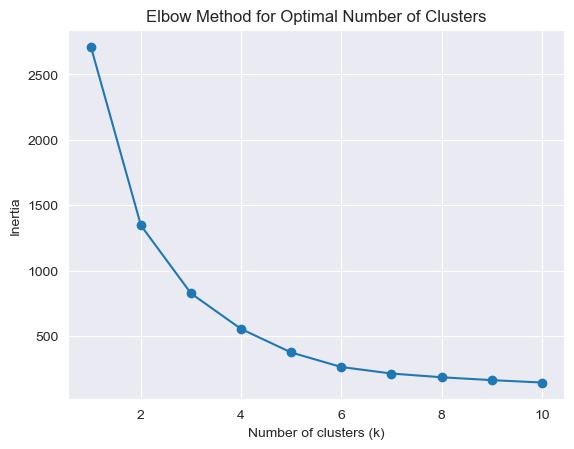

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming df is your DataFrame with node attributes and edge attributes added

# Convert the DataFrame to a sparse adjacency matrix
#A_dense = pairwise_distances(df_nodes.drop(columns=['Node']), metric='euclidean')
A_dense = df_nodes_norm[metrics_names]

# Apply Louvain community detection algorithm to detect communities (if needed)
# You may need to find an alternative community detection algorithm for DataFrame-based graphs

# Calculate the modularity for different values of k
k_values = range(1, 11)  # Adjust the range as needed
inertias = []

amount_k = len(k_values)
for k in k_values:
    print(f'{k}/{amount_k}')
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    score = silhouette_score(A_dense, kmeans.labels_)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Best number of clusters:", best_k)
silhouette_scores

Best number of clusters: 2


[0.6329845521755666,
 0.6275255484777458,
 0.5768372014522024,
 0.5945641402528105,
 0.6171765515658875,
 0.5874713434956578,
 0.566084242805109,
 0.569177100439908,
 0.5703409924620617]

In [43]:
from sklearn.cluster import KMeans

# Assuming df_nodes is your DataFrame containing node attributes

# Extract the features (attributes) from the DataFrame
X = df_nodes_norm[metrics_names]

# Specify the number of clusters (k)
k = best_k  # Adjust as needed

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_nodes['Cluster'] = cluster_labels
df_nodes_norm['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_nodes


,eigencentrality,popularity,name,followers,genres,eccentricity,betweenesscentrality,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,Cluster
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.0,0.000000,2Mhi3jfuRSdbVZPdjqsnnN,0,0,0.0,0,0.000000,0.0,0
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.0,0.000000,4QFbv1d0BbQANO95hIQaZl,0,0,0.0,1,0.000000,0.0,0
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.0,0.833333,4Omy5P9r7PiXYje9h4jMkz,2,1,1.0,3583,0.750000,8.0,1
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.0,0.180073,5vZr4eKCIxujg3mPZaHGcS,3,3,1.0,4549,0.165762,6.0,0
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.0,0.000000,1TYZpmNJCpmN38laFCVkCm,0,0,0.0,2,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.0,0.000000,5QEZ8qPZSxIvzrkJCxlsn7,0,0,0.0,4748,0.000000,0.0,0
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.0,0.000000,7HBA3bLuJTLRvjK8NX9ZSy,0,0,0.0,4749,0.000000,0.0,0
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.0,0.000000,67ISVBZzcCTTKM17Ps00sx,0,0,0.0,4750,0.000000,0.0,0
6022,0.002182,NaN,NaN,NaN,NaN,1.0,0.0,1.000000,10aVNpUB6sPjYjunSIIeq5,2,1,1.0,4751,1.000000,4.0,1


In [44]:
# Assuming df_nodes is your DataFrame with cluster labels

# Calculate the cardinality of each cluster
cluster_cardinality = df_nodes_norm['Cluster'].value_counts()

# Display the cardinality of each cluster
print(cluster_cardinality)


Cluster
0    5082
1     942
Name: count, dtype: int64
